In [1]:
import pandas as pd

data = pd.read_csv("./data.csv")
temps = data['atemp'].values # in Celsius
rentals = data['cnt'].values

In [2]:

print(f'temps shape:{temps.shape}, rentals shape: {rentals.shape}')


temps shape:(731,), rentals shape: (731,)


In [3]:
pd.Series(temps).describe()

count    731.000000
mean       0.474354
std        0.162961
min        0.079070
25%        0.337842
50%        0.486733
75%        0.608602
max        0.840896
dtype: float64

In [4]:
pd.Series(rentals).describe()

count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
dtype: float64

In [5]:
rentals = rentals /1000

pd.Series(rentals).describe()

count    731.000000
mean       4.504349
std        1.937211
min        0.022000
25%        3.152000
50%        4.548000
75%        5.956000
max        8.714000
dtype: float64

Text(0, 0.5, 'Bike Rentals in 1000s')

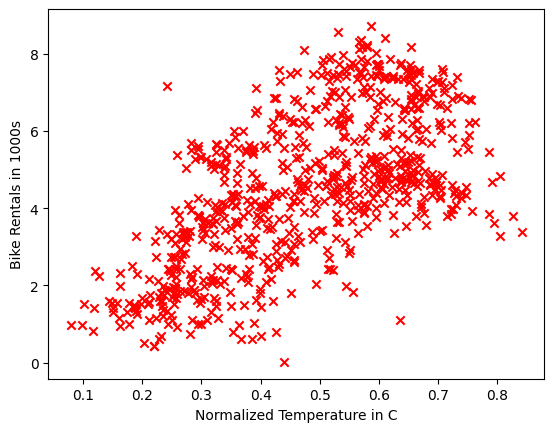

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(temps, rentals, marker='x', color='red')
plt.xlabel('Normalized Temperature in C')
plt.ylabel('Bike Rentals in 1000s')

In [7]:
#cost function
import numpy as np

def compute_cost(X, y, theta):
    return np.sum(np.square(np.matmul(X, theta) - y)) / (2 * len(y))

In [9]:
#vectorizing

theta = np.zeros(2)
X = np.column_stack((np.ones(len(temps)), temps))
y = rentals
cost = compute_cost(X, y, theta)

print('theta:', theta)
print('cost:', cost)

theta: [0. 0.]
cost: 12.018406441176468


In [10]:
#gradient descent update
def gradient_descent(X, y, alpha, iterations):
    theta = np.zeros(2)
    m = len(y)
    
    for i in range(iterations):
        t0 = theta[0] - (alpha / m) * np.sum(np.dot(X, theta) - y)
        t1 = theta[1] - (alpha / m) * np.sum((np.dot(X, theta) - y) * X[:,1])
        theta = np.array([t0, t1])

    return theta

In [11]:
iterations = 5000
alpha = 0.1

theta = gradient_descent(X, y, alpha, iterations)
cost = compute_cost(X, y, theta)

print("theta:", theta)
print('cost:', compute_cost(X, y, theta))

theta: [0.94588081 7.50171673]
cost: 1.1275869258439812


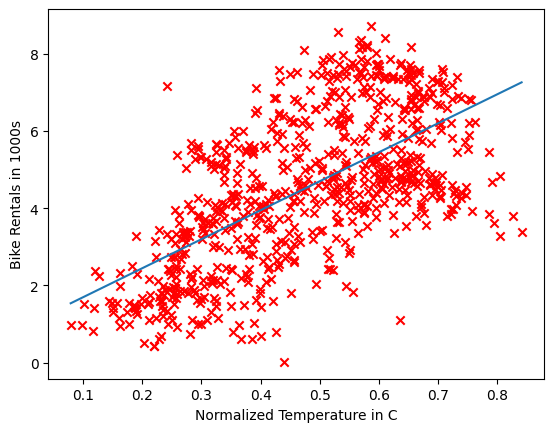

In [12]:
plt.scatter(temps, rentals, marker='x', color='red')
plt.xlabel('Normalized Temperature in C')
plt.ylabel('Bike Rentals in 1000s')
samples = np.linspace(min(temps), max(temps))
plt.plot(samples, theta[0] + theta[1] * samples)

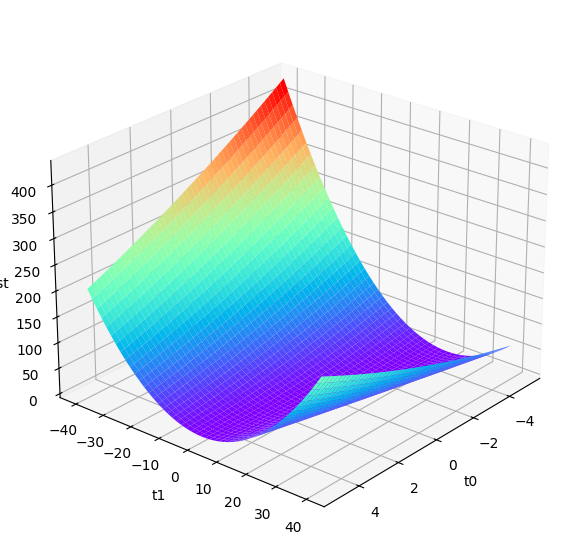

In [13]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

Xs, Ys = np.meshgrid(
    np.linspace(-5, 5, 50),
    np.linspace(-40, 40, 50)
)

Zs = np.array([
    compute_cost(X, y, [t0, t1])
    for t0, t1 in zip(np.ravel(Xs), np.ravel(Ys))])
Zs = Zs.reshape(Xs.shape)

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel(r't0')
ax.set_ylabel(r't1')
ax.set_zlabel(r'cost')
ax.view_init(elev=25, azim=40)

ax.plot_surface(Xs, Ys, Zs, cmap=cm.rainbow)
plt.show()

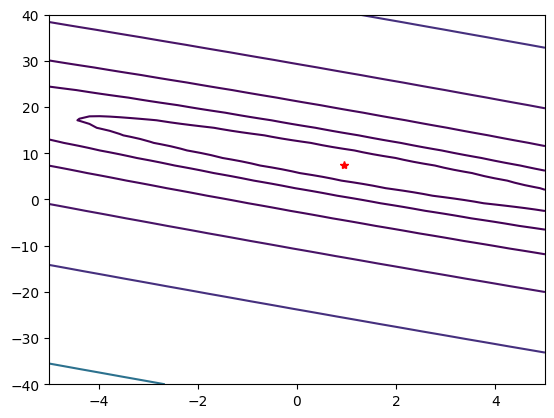

In [14]:
ax = plt.figure().gca()
ax.plot(theta[0], theta[1], 'r*')
plt.contour(Xs, Ys, Zs, np.logspace(-3, 3, 15))